<a href="https://colab.research.google.com/github/Emma-Ok/Phishing-Detection-ML/blob/alc4dev/ModelsWithAllSamples/LogisticRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import optuna
from optuna.samplers import TPESampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix, 
                           ConfusionMatrixDisplay, roc_curve, auc, f1_score, 
                           precision_score, recall_score, matthews_corrcoef)
import warnings
warnings.filterwarnings('ignore')

# Carga directa desde GitHub
url = "https://raw.githubusercontent.com/Emma-Ok/Phishing-Detection-ML/main/Phishing_Legitimate_full.csv"
df = pd.read_csv(url)
df = df.drop(columns=['id'])

print(f"Dataset shape: {df.shape}")
print(f"Distribución de clases:\n{df['CLASS_LABEL'].value_counts()}")

# Separar X e y
X = df.drop(columns=['CLASS_LABEL'])
y = df['CLASS_LABEL']

# División estratificada del dataset: 80% train, 20% test (simplificada para eficiencia)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Mantiene proporción de clases
)

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [3]:
print(f"\nTamaños de conjuntos:")
print(f"Train: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Tamaños de conjuntos:
Train: 8000 (80.0%)
Test: 2000 (20.0%)


In [4]:
def objective(trial):
    # Sugerir hiperparámetros
    C = trial.suggest_float('C', 0.1, 50, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    # Manejar combinaciones válidas de penalty y solver
    if penalty == 'elasticnet':
        solver = 'saga'  # elasticnet solo funciona con saga
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    else:
        l1_ratio = None
    
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        solver = 'liblinear'
    
    # Crear el modelo
    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=max_iter,
        l1_ratio=l1_ratio,
        random_state=42
    )
    
    # Evaluación con validación cruzada
    scores = cross_val_score(
        model, X_train_scaled, y_train,
        cv=5, scoring='f1', n_jobs=-1
    )
    
    return scores.mean()

In [5]:
# Crear el estudio
study = optuna.create_study(
    direction='maximize',  # Maximizar accuracy
    sampler=optuna.samplers.TPESampler(seed=42)
)

# Ejecutar la optimización
study.optimize(objective, n_trials=20, n_jobs=-1, show_progress_bar=True)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:")
print(study.best_params)
print(f"Mejor f1-score: {study.best_value:.4f}")

[I 2025-06-28 00:03:48,331] A new study created in memory with name: no-name-2d66a49c-fdad-409a-810e-36699d279495


  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[I 2025-06-28 00:04:09,038] Trial 7 finished with value: 0.9422997522144181 and parameters: {'C': 47.77206225160828, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 714}. Best is trial 7 with value: 0.9422997522144181.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:09,847] Trial 3 finished with value: 0.9424308036567128 and parameters: {'C': 23.904679250552135, 'penalty': 'elasticnet', 'solver': 'liblinear', 'max_iter': 696, 'l1_ratio': 0.8364752346183949}. Best is trial 3 with value: 0.9424308036567128.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

[I 2025-06-28 00:04:13,262] Trial 5 finished with value: 0.9428829924921122 and parameters: {'C': 25.593628394292082, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 993}. Best is trial 5 with value: 0.9428829924921122.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:15,591] Trial 1 finished with value: 0.940565932426962 and parameters: {'C': 9.039126087626157, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 186}. Best is trial 5 with value: 0.9428829924921122.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:16,639] Trial 4 finished with value: 0.9397075747528041 and parameters: {'C': 4.139713279004248, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 127}. Best is trial 5 with value: 0.9428829924921122.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:17,698] Trial 2 finished with value: 0.9399696369519944 and parameters: {'C': 0.7746797781528104, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 144}. Best is trial 5 with value: 0.9428829924921122.
[I 2025-06-28 00:04:18,001] Trial 9 finished with value: 0.9423607216813844 and parameters: {'C': 0.4799346277780671, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 681}. Best is trial 5 with value: 0.9428829924921122.
[I 2025-06-28 00:04:18,620] Trial 8 finished with value: 0.9427528540798468 and parameters: {'C': 48.41689369187426, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 753}. Best is trial 5 with value: 0.9428829924921122.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:20,340] Trial 11 finished with value: 0.9408384331103397 and parameters: {'C': 0.2912302986354922, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 773}. Best is trial 5 with value: 0.9428829924921122.
[I 2025-06-28 00:04:20,354] Trial 0 finished with value: 0.9423136175332868 and parameters: {'C': 8.125476108218917, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 917}. Best is trial 5 with value: 0.9428829924921122.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:21,326] Trial 10 finished with value: 0.9402151543296835 and parameters: {'C': 0.6280768260387418, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 187}. Best is trial 5 with value: 0.9428829924921122.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:21,738] Trial 6 finished with value: 0.9418032534061298 and parameters: {'C': 29.5765788323495, 'penalty': 'elasticnet', 'solver': 'liblinear', 'max_iter': 532, 'l1_ratio': 0.6767025443148615}. Best is trial 5 with value: 0.9428829924921122.
[I 2025-06-28 00:04:22,603] Trial 13 finished with value: 0.9431317657976208 and parameters: {'C': 36.94138730784015, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 189}. Best is trial 13 with value: 0.9431317657976208.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:33,486] Trial 12 finished with value: 0.9421679755266249 and parameters: {'C': 4.082605591984263, 'penalty': 'elasticnet', 'solver': 'saga', 'max_iter': 677, 'l1_ratio': 0.13660534924436596}. Best is trial 13 with value: 0.9431317657976208.
[I 2025-06-28 00:04:33,773] Trial 15 finished with value: 0.9409477624514484 and parameters: {'C': 0.2025761431979547, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 391}. Best is trial 13 with value: 0.9431317657976208.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:37,150] Trial 17 finished with value: 0.9421837005028865 and parameters: {'C': 1.5822631108751992, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 413}. Best is trial 13 with value: 0.9431317657976208.


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-06-28 00:04:37,933] Trial 16 finished with value: 0.9403184166007652 and parameters: {'C': 30.242185005540446, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 173}. Best is trial 13 with value: 0.9431317657976208.
[I 2025-06-28 00:04:37,995] Trial 19 finished with value: 0.9401547719836127 and parameters: {'C': 0.10685366609062676, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 976}. Best is trial 13 with value: 0.9431317657976208.
[I 2025-06-28 00:04:38,765] Trial 18 finished with value: 0.9427528540798468 and parameters: {'C': 46.18370250630872, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 980}. Best is trial 13 with value: 0.9431317657976208.
[I 2025-06-28 00:04:41,841] Trial 14 finished with value: 0.9412328668991187 and parameters: {'C': 0.3713430184420627, 'penalty': 'elasticnet', 'solver': 'liblinear', 'max_iter': 999, 'l1_ratio': 0.6703020017950615}. Best is trial 13 with value: 0.9431317657976208.
Mejores hiperparámetros:
{'C': 36.94138730784015, 'penalty': 


=== EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA ===
Accuracy: 0.9525
Precision: 0.9449
Recall (Sensitivity): 0.9610
Specificity: 0.9440
F1-Score: 0.9529
AUC-ROC: 0.9869
Matthews Correlation Coefficient: 0.9051

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.94      0.96      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



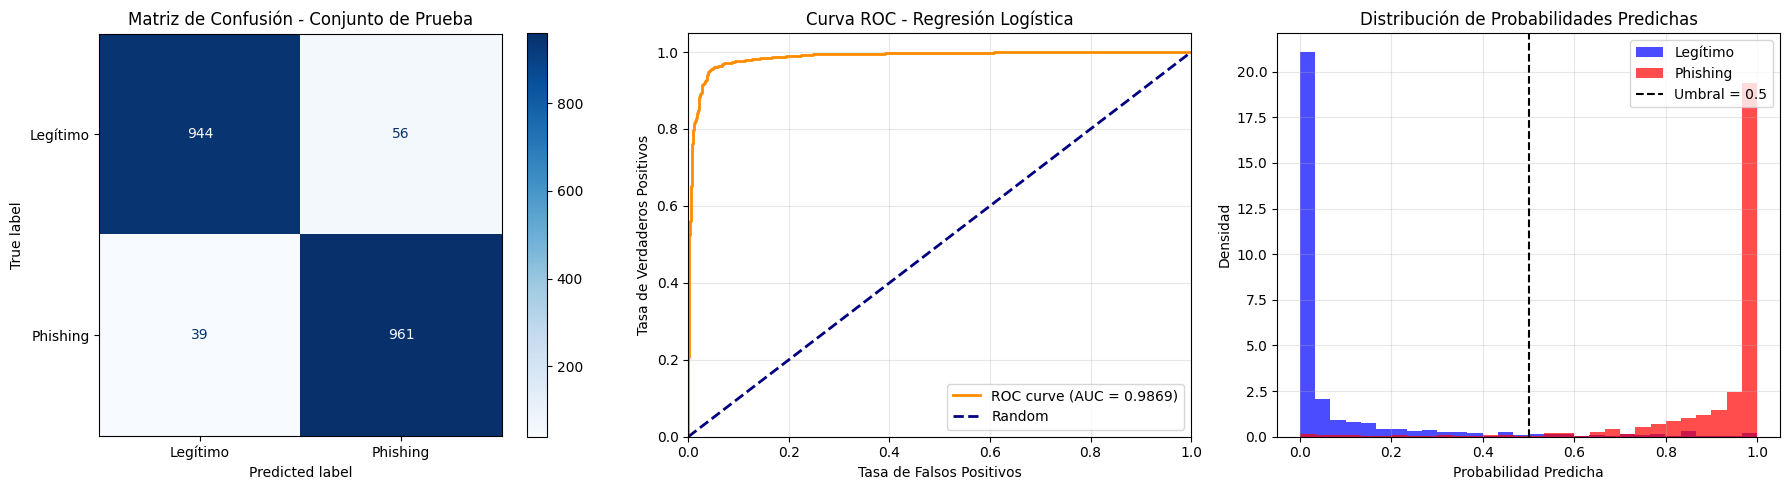

In [6]:
# Obtener el mejor modelo

# Asumiendo que X_train_scaled y y_train están definidos desde antes
# (Tus datos escalados de entrenamiento)
best_trial = study.best_trial
best_params = best_trial.params
# Asegúrate de manejar las dependencias de los parámetros como en tu función objective
# Por ejemplo, para 'elasticnet' necesitas 'l1_ratio' y 'solver' debe ser 'saga'
if best_params['penalty'] == 'elasticnet':
    best_params['solver'] = 'saga' # Asegura que el solver sea saga para elasticnet
    # l1_ratio ya debería estar en best_params si se sugirió
else:
    best_params['l1_ratio'] = None # Para 'l1' o 'l2', l1_ratio no es aplicable

# Si penalty es 'l1' y el solver sugerido no es 'liblinear' o 'saga',
# lo ajustamos a 'liblinear' (como en tu objective)
if best_params['penalty'] == 'l1' and best_params['solver'] not in ['liblinear', 'saga']:
    best_params['solver'] = 'liblinear'


# Crear el modelo con los mejores hiperparámetros
best_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    l1_ratio=best_params['l1_ratio'] if 'l1_ratio' in best_params and best_params['l1_ratio'] is not None else None, # Asegurarse de pasar l1_ratio solo cuando sea aplicable
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento completos
best_model.fit(X_train_scaled, y_train)

# Ahora tienes tu "mejor modelo" entrenado y listo para usar

# Evaluación final en conjunto de prueba
print("\n=== EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA ===")
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Métricas principales según metodología
test_accuracy = best_model.score(X_test_scaled, y_test)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)
test_mcc = matthews_corrcoef(y_test, y_test_pred)

# Cálculo de specificity
cm = confusion_matrix(y_test, y_test_pred)
test_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall (Sensitivity): {test_recall:.4f}")
print(f"Specificity: {test_specificity:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"AUC-ROC: {test_auc:.4f}")
print(f"Matthews Correlation Coefficient: {test_mcc:.4f}")

print(f"\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Visualizaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legítimo', 'Phishing'])
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Matriz de Confusión - Conjunto de Prueba')

# 2. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc_value = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC - Regresión Logística')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

# 3. Distribución de probabilidades
axes[2].hist(y_test_proba[y_test == 0], bins=30, alpha=0.7, label='Legítimo', color='blue', density=True)
axes[2].hist(y_test_proba[y_test == 1], bins=30, alpha=0.7, label='Phishing', color='red', density=True)
axes[2].axvline(x=0.5, color='black', linestyle='--', label='Umbral = 0.5')
axes[2].set_xlabel('Probabilidad Predicha')
axes[2].set_ylabel('Densidad')
axes[2].set_title('Distribución de Probabilidades Predichas')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# ANÁLISIS DE LOS MEJORES RESULTADOS DE OPTUNA
print("\n=== ANÁLISIS DE OPTUNA ===")
print("Top 5 combinaciones de hiperparámetros:")

# Extraer y mostrar los 5 mejores ensayos
top_trials = sorted(study.trials, key=lambda t: t.value if t.value is not None else -1, reverse=True)[:5]
for i, trial in enumerate(top_trials):
    print(f"F1: {trial.value:.4f} - {trial.params}")

# RESUMEN DE RESULTADOS PARA COMPARACIÓN CON OTROS MODELOS
print("\n=== RESUMEN PARA COMPARACIÓN DE MODELOS ===")
print("Regresión Logística (Optuna):")
print(f"  CV F1-Score: {study.best_value:.4f}")
print(f"  Test F1-Score: {test_f1:.4f}")
print(f"  Test AUC-ROC: {test_auc:.4f}")
print(f"  Test Accuracy: {test_accuracy:.4f}")
print(f"  Mejores hiperparámetros: {study.best_params}")

# ANÁLISIS DE ESTABILIDAD (diferencia entre CV y Test)
cv_f1 = study.best_value
print(f"\n=== ANÁLISIS DE ESTABILIDAD ===")
print(f"Diferencia F1 (CV - Test): {cv_f1 - test_f1:.4f}")

if abs(cv_f1 - test_f1) < 0.05:
    print("✓ Modelo muestra buena estabilidad (diferencia F1 < 0.05)")
else:
    print("⚠ Posible overfitting o underfitting (diferencia F1 >= 0.05)")

# GUARDAR RESULTADOS DEL MODELO PARA COMPARACIÓN POSTERIOR
logistic_results = {
    'model_name': 'Logistic Regression (Optuna)',
    'best_params': study.best_params,
    'cv_f1': cv_f1,
    'test_f1': test_f1,
    'test_auc': test_auc,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_specificity': test_specificity,
    'test_mcc': test_mcc
}

print(f"\nResultados guardados para comparación: logistic_results")
print("\n🚀 Entrenamiento completado exitosamente con Optuna!")



=== ANÁLISIS DE OPTUNA ===
Top 5 combinaciones de hiperparámetros:
F1: 0.9431 - {'C': 36.94138730784015, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 189}
F1: 0.9429 - {'C': 25.593628394292082, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 993}
F1: 0.9428 - {'C': 48.41689369187426, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 753}
F1: 0.9428 - {'C': 46.18370250630872, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 980}
F1: 0.9424 - {'C': 23.904679250552135, 'penalty': 'elasticnet', 'solver': 'liblinear', 'max_iter': 696, 'l1_ratio': 0.8364752346183949}

=== RESUMEN PARA COMPARACIÓN DE MODELOS ===
Regresión Logística (Optuna):
  CV F1-Score: 0.9431
  Test F1-Score: 0.9529
  Test AUC-ROC: 0.9869
  Test Accuracy: 0.9525
  Mejores hiperparámetros: {'C': 36.94138730784015, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 189}

=== ANÁLISIS DE ESTABILIDAD ===
Diferencia F1 (CV - Test): -0.0098
✓ Modelo muestra buena estabilidad (diferencia F1 < 0.05)

Resultados 